Scegli il numero di prove dell'esperimento, e premi invio


 6




Il numero di prove scelto è 6



Scegli il valore di probabilità di riuscita dell'esperimento e premi invio: 3




La probabilità è un numero tra zero e uno, tenta di nuovo!



Scegli il valore di probabilità di riuscita dell'esperimento e premi invio: 0.3




La probabilità di riuscita dell'esperimento è 0.3




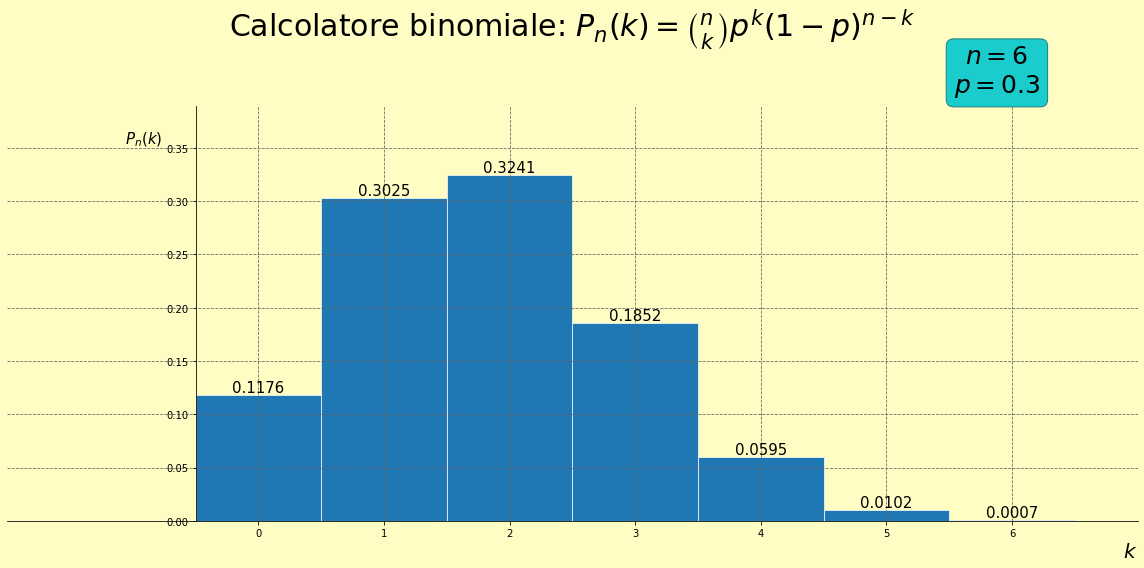

In [11]:
print("Scegli il numero di prove dell'esperimento, e premi invio")
N= int(input()) #numero di prove
print("\n\nIl numero di prove scelto è "+str(N))


while True:
    p= float(input("\nScegli il valore di probabilità di riuscita dell'esperimento e premi invio:")) #probabilità di successo
    
    if not 0<= p <=1:
        print("\n\nLa probabilità è un numero tra zero e uno, tenta di nuovo!")
        continue
    else:
        print("\n\nLa probabilità di riuscita dell'esperimento è "+str(p)+"\n\n")
        break




import numpy as np # linear algebra

import matplotlib as mpl 

import matplotlib.pyplot as plt


import scipy.special

n_p= 1-p #probabilità di non successo



C_N_k = []

for k in np.arange(N+1):
    C_N_k.append(scipy.special.binom(N, k)*(p**k)*(n_p**(N-k)))
    

plt.rcdefaults 
with plt.style.context('seaborn-paper'):#scegliamo lo stile

  fig, ax = plt.subplots(figsize = (16,8))# create the figure


# ax.plot(np.arange(N+1),C_N_k,"b.-")




rects1 = ax.bar(np.arange(N+1),C_N_k, width=1, edgecolor="white", linewidth=0.7, label="n=15")

# ax.legend(loc=1,fontsize=20)


# Spostiamo gli assi nell'origine, vogliamo che passino per (0,0) o lì vicino
ax.spines['left'].set_position(('data', -0.5))
ax.spines['bottom'].set_position('zero')

# se uno vuole può provare ax.spines['left'].set_color('b'), ecc, https://matplotlib.org/3.3.3/gallery/ticks_and_spines/spine_placement_demo.html

# Eliminiamo l'asse superiore e quello di destra
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Mostriamo i tiks solo negli assi inferiore e di sinistra, ora al centro
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Scegliamo i valori di x e y che vogliamo come limiti del nostro grafico

y_lim= np.amax(C_N_k) 
plt.axis([-2,N+1,0,1.2*y_lim])


# BOX DATI
ax.text(0.98*N, 1.3*y_lim, r"$n=$"+str(N)+"\n$p=$"+str(p), size=25, rotation=0.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(0.1, 0.5, 0.5),#edgecolor, si può mettere anche 'red' o altro
                   fc=(0.1, 0.8, 0.8),#facecolor
                   )
         )



# Solitamente sono utili i nomi degli assi
ax.set_xlabel(r'$k$', position=(1,0), horizontalalignment='right',fontsize=20 )


ax.set_ylabel(r'$P_n(k)$', position=(0,0.90), horizontalalignment='right' ,
              verticalalignment = 'bottom', rotation = 0,fontsize=15)

ax.set_xticks(range(0,N+1))
ax.set_xticklabels(range(0,N+1))


ax.bar_label(rects1,fmt='%.4f', fontsize=15)


ax.set_title(r'Calcolatore binomiale:'+r' $P_n(k)=\binom{n}{k} p^k (1-p)^{n-k}$', fontsize=30, y=1.0, pad=70)


#ax.grid(True)
# Show the grid lines as dark grey lines
ax.grid(True, which='major', color='#666666', linestyle='--')

fig.patch.set_facecolor('xkcd:egg shell') # tanti colori https://xkcd.com/color/rgb/
ax.set_facecolor('xkcd:egg shell')
fig.tight_layout()


# volendo si può chiedere un file immagine con il grafico
# plt.savefig('f.png', format="png", dpi= 100)


fig.show()